Ultimate Inc. Challenge


Part 1 - Exploratory Data Analysis

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
import datetime


In [2]:
login_times = pd.read_json('logins.json')

In [3]:
login_times.head()


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
# keys
login_times.keys()

Index(['login_time'], dtype='object')

In [5]:
# How many entries
print(len(login_times['login_time']))

93142


In [6]:
login_times.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [7]:
df = login_times

In [8]:
missing_values = df.isnull()
missing_counts = df.isnull().sum()

# To check if there are any missing values in the entire DataFrame:
any_missing = df.isnull().any().any()

# To get a summary of missing values, you can use:
missing_summary = df.isnull().sum().to_frame(name='Missing Count')
missing_summary['Percentage'] = (missing_summary['Missing Count'] / len(df)) * 100


In [9]:

# Check for missing values
missing_values = df.isnull()
missing_counts = df.isnull().sum()
any_missing = df.isnull().any().any()
missing_summary = df.isnull().sum().to_frame(name='Missing Count')
missing_summary['Percentage'] = (missing_summary['Missing Count'] / len(df)) * 100

# Print the results
print("Missing Values:")
print(missing_values)

print("\nMissing Value Counts:")
print(missing_counts)

print("\nAny Missing Values:")
print(any_missing)

print("\nMissing Value Summary:")
print(missing_summary)

Missing Values:
       login_time
0           False
1           False
2           False
3           False
4           False
...           ...
93137       False
93138       False
93139       False
93140       False
93141       False

[93142 rows x 1 columns]

Missing Value Counts:
login_time    0
dtype: int64

Any Missing Values:
False

Missing Value Summary:
            Missing Count  Percentage
login_time              0         0.0


Aggregate these login counts based on 15 minute time intervals.



In [10]:
df.set_index('login_time', inplace=True)
df['count'] = 1
df.sort_index(inplace=True)

In [11]:
df_agg = df.resample("15min").sum()
df_agg.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [12]:
df_agg['count'].sum()

93142

Visualize and describe the resulting time series of login counts

In [13]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


Data starts on January 1, 1970 and ends on April 13, 1970. 

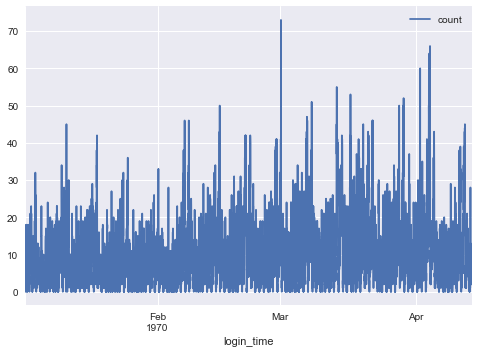

In [14]:
df_agg.plot()
plt.show()

There seems to be sudden spikes immediatly followed by going back to usual pattern. 

In [15]:
df_agg.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


The average number of logins per 15 minutes is 9.52 while the median is 7. The numbers are probably being influenced by the previously mentioned spikes.

In [16]:
#Adding columns to better look at the data
df_agg = df_agg.assign(month=df_agg.index.month)
df_agg = df_agg.assign(month_day=df_agg.index.day)
df_agg = df_agg.assign(weekday=df_agg.index.weekday)
df_agg.head()

,count,month,month_day,weekday
login_time,,,,
1970-01-01 20:00:00,2,1,1,3
1970-01-01 20:15:00,6,1,1,3
1970-01-01 20:30:00,9,1,1,3
1970-01-01 20:45:00,7,1,1,3
1970-01-01 21:00:00,1,1,1,3


In [17]:
if (df_agg['count'] == 0).any():
    print("There are values equal to 0 in the 'count' column.")
else:
    print("There are no values equal to 0 in the 'count' column.")

There are values equal to 0 in the 'count' column.


In [18]:
# let's try to figure out when the spikes occur.
spike = np.quantile(df_agg,0.99)
df_spike = df_agg[df_agg['count'] >= spike]
months = []
month_days = []
weekdays = []

for date in df_spike.index:
    month_days.append(date.day)
    weekdays.append(date.weekday())
    
df_spike_months = pd.DataFrame(months,columns=['month'],index=range(len(months)))  
df_spike_days = pd.DataFrame(month_days,columns=['day'],index=range(len(month_days)))
df_spike_weekdays = pd.DataFrame(weekdays,columns=['weekday'],index=range(len(weekdays)))


In [19]:
df_spike_days.day.value_counts()


21    25
4     24
22    18
15    18
28    17
7     15
8     15
14    14
29    14
3     13
12    13
13    11
1     11
18    10
11    10
6      9
19     9
27     8
5      8
17     7
10     4
20     4
2      4
25     2
24     1
16     1
30     1
Name: day, dtype: int64

While there are some that seem to have more than others, it is not easy to see a pattern in the data above. Also, not all months have equal number of days. 

In [20]:
df_spike_weekdays.weekday.value_counts()


5    104
6    103
4     48
3     15
2      7
1      7
0      2
Name: weekday, dtype: int64

In [21]:
#let's look at the actual names:

weekday_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

weekday_counts = df_spike_weekdays['weekday'].value_counts().rename(index=weekday_names)

weekday_counts

Saturday     104
Sunday       103
Friday        48
Thursday      15
Wednesday      7
Tuesday        7
Monday         2
Name: weekday, dtype: int64

It appears that most of the logins occur during weekends. 

In [22]:
df_agg = df_agg.assign(time=df_agg.index.time)


In [23]:
df_agg

,count,month,month_day,weekday,time
login_time,,,,,
1970-01-01 20:00:00,2,1,1,3,20:00:00
1970-01-01 20:15:00,6,1,1,3,20:15:00
1970-01-01 20:30:00,9,1,1,3,20:30:00
1970-01-01 20:45:00,7,1,1,3,20:45:00
1970-01-01 21:00:00,1,1,1,3,21:00:00
...,...,...,...,...,...
1970-04-13 17:45:00,5,4,13,0,17:45:00
1970-04-13 18:00:00,5,4,13,0,18:00:00
1970-04-13 18:15:00,2,4,13,0,18:15:00


In [24]:
df_agg.dtypes

count         int64
month         int64
month_day     int64
weekday       int64
time         object
dtype: object

In [28]:

# Group by 'time' and calculate the sum of 'count' for each time
time_counts = df_agg.groupby('time')['count'].sum()

# Find the most popular time of day (maximum count)
most_popular_times = time_counts.nlargest(20)  # Get the top 5 most popular times

# Print the list of most popular times with their counts
print("Most popular times of day and their counts:")
for time, count in most_popular_times.items():
    print(f"Time: {time}, Count: {count}")

Most popular times of day and their counts:
Time: 22:30:00, Count: 1684
Time: 01:30:00, Count: 1673
Time: 22:15:00, Count: 1652
Time: 22:45:00, Count: 1637
Time: 22:00:00, Count: 1634
Time: 11:30:00, Count: 1622
Time: 01:15:00, Count: 1598
Time: 23:00:00, Count: 1573
Time: 11:45:00, Count: 1570
Time: 21:45:00, Count: 1554
Time: 23:15:00, Count: 1552
Time: 01:00:00, Count: 1549
Time: 00:15:00, Count: 1547
Time: 02:15:00, Count: 1526
Time: 00:30:00, Count: 1525
Time: 02:00:00, Count: 1509
Time: 01:45:00, Count: 1497
Time: 21:30:00, Count: 1492
Time: 00:45:00, Count: 1482
Time: 23:45:00, Count: 1477


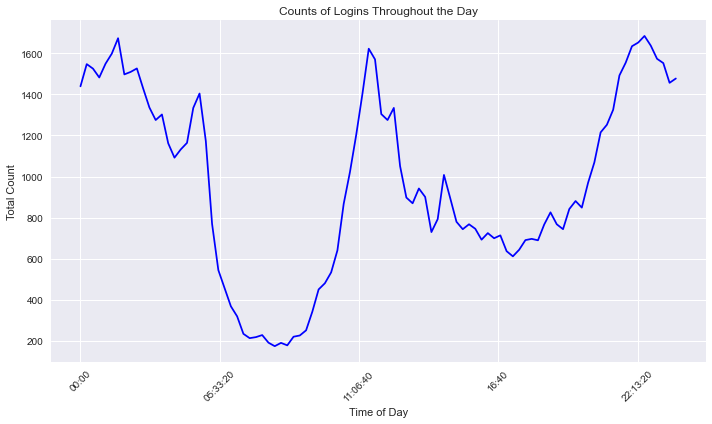

In [31]:
# Group by 'time' and calculate the sum of 'count' for each time
time_counts = df_agg.groupby('time')['count'].sum()

# Plotting
plt.figure(figsize=(10, 6))
time_counts.plot(kind='line', color='blue')
plt.title('Counts of Logins Throughout the Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

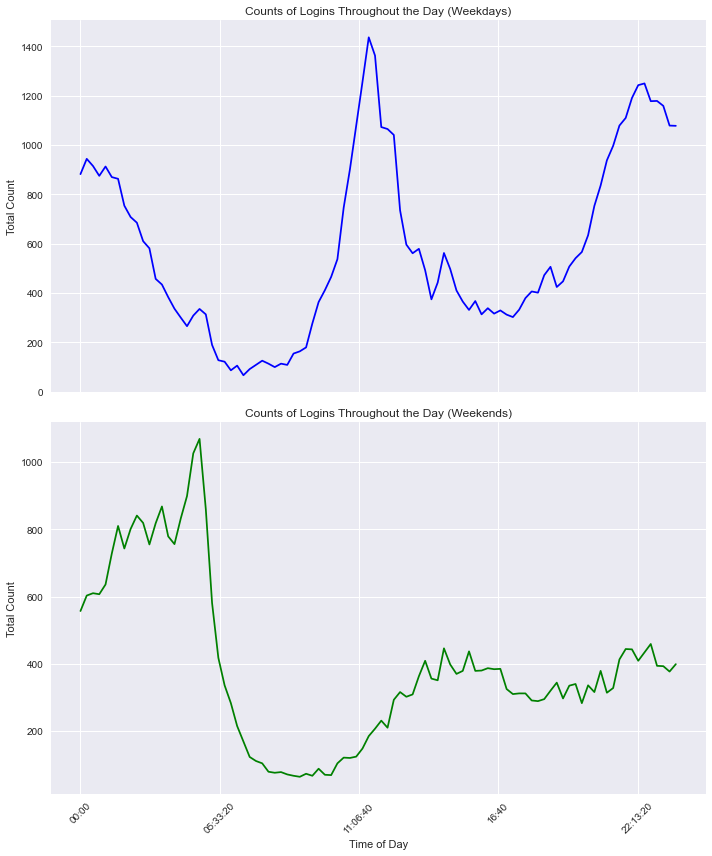

In [34]:
# Group by 'time' and calculate the sum of 'count' for each time
time_counts = df_agg.groupby('time')['count'].sum()

# Create separate DataFrames for weekdays and weekends
weekdays_df = df_agg[df_agg['weekday'] <= 4]
weekends_df = df_agg[df_agg['weekday'] >= 5]

# Group by 'time' and calculate the sum of 'count' for each time for weekdays and weekends
weekdays_counts = weekdays_df.groupby('time')['count'].sum()
weekends_counts = weekends_df.groupby('time')['count'].sum()

# Plotting
fig, axes = plt.subplots(nrows=2, figsize=(10, 12), sharex=True)

# Weekdays plot
weekdays_counts.plot(ax=axes[0], kind='line', color='blue')
axes[0].set_title('Counts of Logins Throughout the Day (Weekdays)')
axes[0].set_ylabel('Total Count')

# Weekends plot
weekends_counts.plot(ax=axes[1], kind='line', color='green')
axes[1].set_title('Counts of Logins Throughout the Day (Weekends)')
axes[1].set_xlabel('Time of Day')
axes[1].set_ylabel('Total Count')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It appears that during weekdays, there is a spike during morning, noon, and evening. Most likely heading to work, lunch, and then returning home. Interestingly, during weekends, there is a spike in the early morning, then a drastic slowdown until very late morning through the evening where rides happen consistently and are more evenly spreadout. That might be explained as people trying to get to their location early morning and then they go home whenever they are ready. 